Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Train PCA shape: (966, 150)
Test PCA shape: (322, 150)


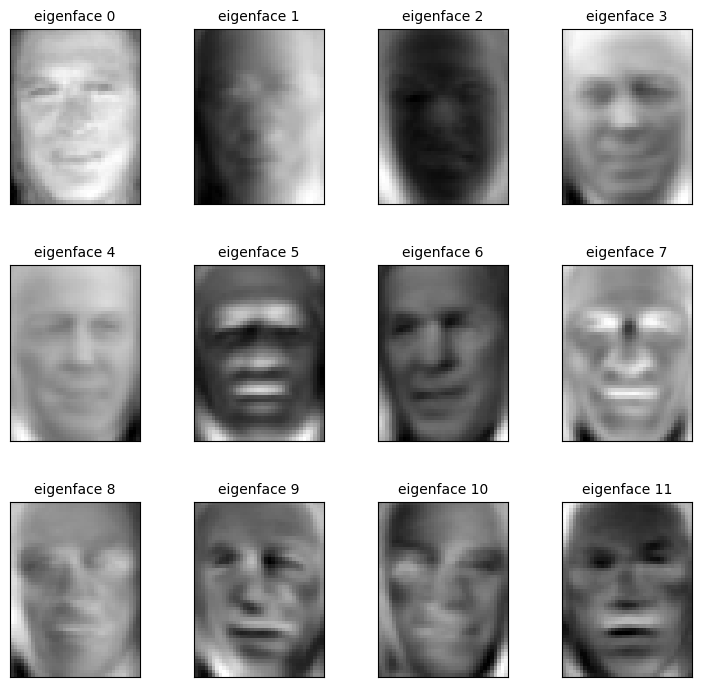

In [4]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load LFW People Dataset
# -----------------------------
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Introspect image array to find shape
n_samples, h, w = lfw_people.images.shape

# Use data matrix (flattened images) for ML
X = lfw_people.data
n_features = X.shape[1]

# Labels (target = person ID)
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print(f"n_samples: {n_samples}")
print(f"n_features: {n_features}")
print(f"n_classes: {n_classes}")

# -----------------------------
# 2. Split into Train/Test
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# -----------------------------
# 3. PCA (Eigenfaces)
# -----------------------------
n_components = 150  # Number of eigenfaces to keep

# Center data (subtract training mean)
mean = np.mean(X_train, axis=0)
X_train_centered = X_train - mean
X_test_centered = X_test - mean

# Perform SVD: X = U * S * V
U, S, Vt = np.linalg.svd(X_train_centered, full_matrices=False)

# Principal components (top eigenfaces)
components = Vt[:n_components]

# Reshape components into eigenfaces
eigenfaces = components.reshape((n_components, h, w))

# Project data into PCA subspace (face space)
X_train_pca = np.dot(X_train_centered, components.T)
X_test_pca = np.dot(X_test_centered, components.T)

print("Train PCA shape:", X_train_pca.shape)
print("Test PCA shape:", X_test_pca.shape)

# -----------------------------
# 4. Plot Eigenfaces
# -----------------------------
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of images."""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=10)
        plt.xticks(())
        plt.yticks(())

# Titles for the eigenfaces
eigenface_titles = [f"eigenface {i}" for i in range(eigenfaces.shape[0])]

# Show the first 12 eigenfaces
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=3, n_col=4)
plt.show()


Train PCA shape: torch.Size([966, 150])
Test PCA shape: torch.Size([322, 150])


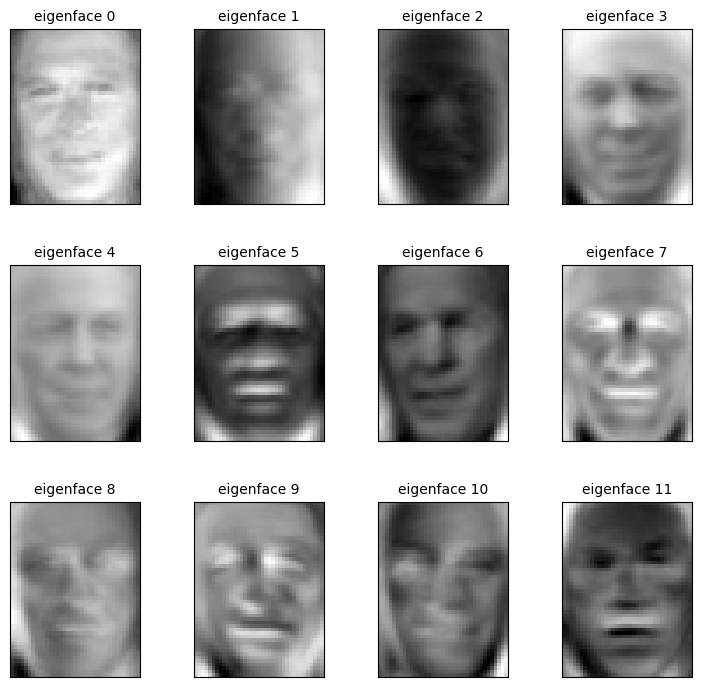

In [5]:
import torch

# -----------------------------
# 3. PCA (Eigenfaces) with PyTorch
# -----------------------------
n_components = 150  # Number of eigenfaces to keep

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Compute mean of training data
mean_torch = torch.mean(X_train_tensor, dim=0)
X_train_centered = X_train_tensor - mean_torch
X_test_centered = X_test_tensor - mean_torch

# Perform SVD with PyTorch
# X = U * S * Vh
U, S, Vh = torch.linalg.svd(X_train_centered, full_matrices=False)

# Take top components (principal axes)
components_torch = Vh[:n_components, :]  # shape: (n_components, n_features)

# Project data into PCA space (face space)
X_train_pca_torch = torch.matmul(X_train_centered, components_torch.T)
X_test_pca_torch = torch.matmul(X_test_centered, components_torch.T)

print("Train PCA shape:", X_train_pca_torch.shape)
print("Test PCA shape:", X_test_pca_torch.shape)

# Convert components back to NumPy for plotting
eigenfaces_torch = components_torch.cpu().numpy().reshape((n_components, h, w))
plot_gallery(eigenfaces_torch, eigenface_titles, h, w, n_row=3, n_col=4)
plt.show()


torch.Size([966])


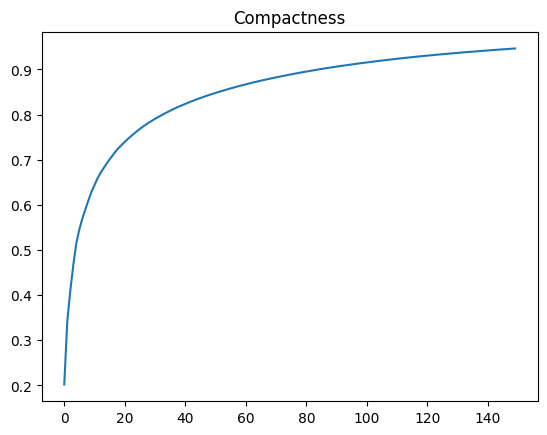

In [6]:
explained_variance = (S ** 2) / (n_samples- 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)
plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()